## Workflow
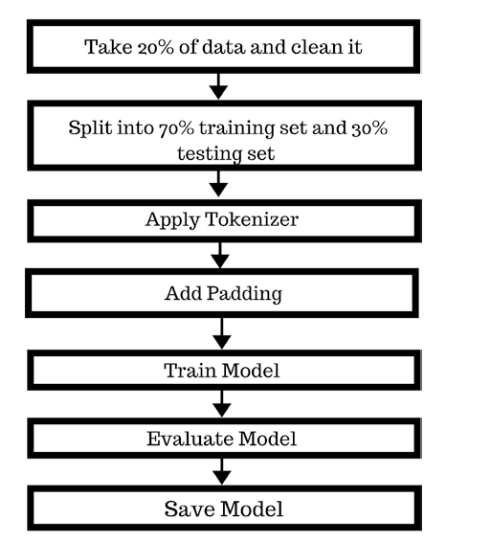

In [2]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import pandas as pd
import re
import keras
from keras import Model
from tensorflow.keras.layers import Flatten,LSTM,Dense,Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.initializers import glorot_uniform
from sklearn import model_selection

2023-05-08 14:31:23.635710: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 14:31:23.772793: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 14:31:23.773572: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 14:31:24.616331: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [18]:
#Reading data
data = pd.read_csv('sentimentAnalysis/train.csv',names = ['polarity_label','consumer_review','reaction'], header=None)

In [19]:
data['consumer_review'] = data['consumer_review']+ '.' + data['reaction']
data

,polarity_label,consumer_review,reaction
0,2,Stuning even for the non-gamer.This sound trac...,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything..I'm read...,I'm reading a lot of reviews saying that this ...
2,2,Amazing!.This soundtrack is my favorite music ...,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack.I truly like this soundtr...,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
3599995,1,Don't do it!!.The high chair looks great when ...,The high chair looks great when it first comes...
3599996,1,"Looks nice, low functionality.I have used this...",I have used this highchair for 2 kids now and ...
3599997,1,"compact, but hard to clean.We have a small hou...","We have a small house, and really wanted two o..."
3599998,1,what is it saying?.not sure what this book is ...,not sure what this book is supposed to be. It ...


In [20]:
data.drop(['reaction'],axis=1,inplace = True)

In [21]:
data['polarity_label']= data['polarity_label']-1
data

,polarity_label,consumer_review
0,1,Stuning even for the non-gamer.This sound trac...
1,1,The best soundtrack ever to anything..I'm read...
2,1,Amazing!.This soundtrack is my favorite music ...
3,1,Excellent Soundtrack.I truly like this soundtr...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
3599995,0,Don't do it!!.The high chair looks great when ...
3599996,0,"Looks nice, low functionality.I have used this..."
3599997,0,"compact, but hard to clean.We have a small hou..."
3599998,0,what is it saying?.not sure what this book is ...


In [22]:
_,x_set,_,y_set = model_selection.train_test_split(data['consumer_review'], data['polarity_label'],test_size = 0.02)

In [23]:
#cleaning the data

def data_prep(in_tex):
    # Remove punctuations and numbers
    out_tex = re.sub('[^A-Za-z0-9]+', '', str(in_tex))
    # Convert upper case to lower case
    out_tex="".join(list(map(lambda x:x.lower(),str(out_tex))))
    # Remove single character
    out_tex= re.sub(r"\s+[a-zA-Z]\s+", '', out_tex)
    return out_tex

text_set = []
for reviews in list(x_set):
    text_set.append(data_prep(reviews))
    
x_train = pd.DataFrame()
x_train['consumer_review'] = text_set
x_train['polarity_label'] = list(y_set)

In [24]:
x_train

,consumer_review,polarity_label
0,fantasticresourceiwishihadfoundthisbookearlier...,1
1,laptopownerstakenoteiboughtthisformyparentsand...,1
2,excellentpambonoscoresagainwheneveribuyaquilti...,1
3,perfectforparentsnewandseasonedboughtthisasagi...,1
4,veryglitzypicturesofthemanyfacesofmainecooncat...,1
...,...,...
71995,warningthisisareprintofanearlierworkthiscollec...,0
71996,notworththereadjohneldredgeiswritingfromafunda...,0
71997,wonderfuldiscoveryitsnotyouthisisthegreatestli...,1
71998,untilnowiwouldreallylovetotypesomethingbettera...,0


In [25]:
x_train, x_test, y_train, y_test = \
model_selection.train_test_split(x_train['consumer_review'],x_train['polarity_label'],test_size=0.30)

#convert to array
x_train=np.array(x_train.values.tolist())
x_test=np.array(x_test.values.tolist())
y_train=np.array(y_train.values.tolist())
y_test=np.array(y_test.values.tolist())

In [29]:
#tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
word_index=tokenizer.word_index
total_size = len(word_index)+1
print(total_size)

50396


In [30]:
#text to sequence
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [33]:
max_length = 100
x_train = tf.keras.utils.pad_sequences(x_train, padding='post', maxlen=max_length)
x_test = tf.keras.utils.pad_sequences(x_test, padding='post', maxlen=max_length)

In [ ]:
#Model
model = Sequential()
model.add(Embedding(total_size, 20,input_length = max_length))
model.add(LSTM(32,dropout= 0.2, recurrent_dropout = 0.2))        
model.add(Dense(1,activation= 'sigmoid'))        
          

In [45]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics = ['acc'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 20)           1007920   
                                                                 
 lstm_5 (LSTM)               (None, 196)               170128    
                                                                 
 dense_4 (Dense)             (None, 1)                 197       
                                                                 
Total params: 1,178,245
Trainable params: 1,178,245
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train,y_train,batch_size = 128, epochs = 5, verbose = 1, validation_data = (x_test, y_test))

In [38]:
model.save('lstm.h5')

In [39]:
model = keras.models.load_model('lstm.h5')